In [65]:
import pandas as pd 
import matplotlib.pyplot as plt

In [66]:
# store filepath to variable
violent_property_crime = "Resources/420.csv"

# read csv file to pandas

violent_property_crime_df = pd.read_csv(violent_property_crime)

violent_property_crime_df


,Unnamed: 0,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,...,burglary,larceny,motor_vehicle_theft,Legal Status,Medicinal,Decriminalized,Recreational,Year legalized (Rec),Medical,Year legalized (Med)
0,0,1979,AK,Alaska,406000,1994,54,292.0,NaN,445,...,5616,15076,2501,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
1,1,1980,AK,Alaska,440142,1919,39,250.0,NaN,360,...,5545,14916,2469,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
2,2,1981,AK,Alaska,412000,2537,60,421.0,NaN,472,...,5479,16310,2845,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
3,3,1982,AK,Alaska,438000,2732,81,374.0,NaN,586,...,5204,16672,2603,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
4,4,1983,AK,Alaska,479000,2940,66,486.0,NaN,465,...,5720,17085,3084,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2035,2014,WY,Wyoming,584304,1142,16,127.0,174.0,53,...,1689,9185,603,Fully Illegal,No,No,No,0,No,0
2036,2036,2015,WY,Wyoming,586555,1300,16,124.0,171.0,59,...,1762,8797,592,Fully Illegal,No,No,No,0,No,0
2037,2037,2016,WY,Wyoming,584910,1431,20,152.0,206.0,59,...,1771,8889,800,Fully Illegal,No,No,No,0,No,0
2038,2038,2017,WY,Wyoming,578934,1358,14,NaN,253.0,98,...,1556,8211,761,Fully Illegal,No,No,No,0,No,0


In [67]:
# pull just violent and propety crime out
crime_df = violent_property_crime_df[['year','state_name', 'population','violent_crime','property_crime', 'Year legalized (Rec)', 'Year legalized (Med)']]
crime_df['violent_crime_rate'] = crime_df['violent_crime']/crime_df['population'] * 100
crime_df['property_crime_rate'] = crime_df['property_crime']/crime_df['population'] * 100
crime_df


C:\Users\marin\AppData\Local\Temp\ipykernel_54048\2598172827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['violent_crime_rate'] = crime_df['violent_crime']/crime_df['population'] * 100
C:\Users\marin\AppData\Local\Temp\ipykernel_54048\2598172827.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['property_crime_rate'] = crime_df['property_crime']/crime_df['population'] * 100


,year,state_name,population,violent_crime,property_crime,Year legalized (Rec),Year legalized (Med),violent_crime_rate,property_crime_rate
0,1979,Alaska,406000,1994,23193,2014,1998,0.491133,5.712562
1,1980,Alaska,440142,1919,22930,2014,1998,0.435996,5.209682
2,1981,Alaska,412000,2537,24634,2014,1998,0.615777,5.979126
3,1982,Alaska,438000,2732,24479,2014,1998,0.623744,5.588813
4,1983,Alaska,479000,2940,25889,2014,1998,0.613779,5.404802
...,...,...,...,...,...,...,...,...,...
2035,2014,Wyoming,584304,1142,11477,0,0,0.195446,1.964217
2036,2015,Wyoming,586555,1300,11151,0,0,0.221633,1.901100
2037,2016,Wyoming,584910,1431,11460,0,0,0.244653,1.959276
2038,2017,Wyoming,578934,1358,10528,0,0,0.234569,1.818515


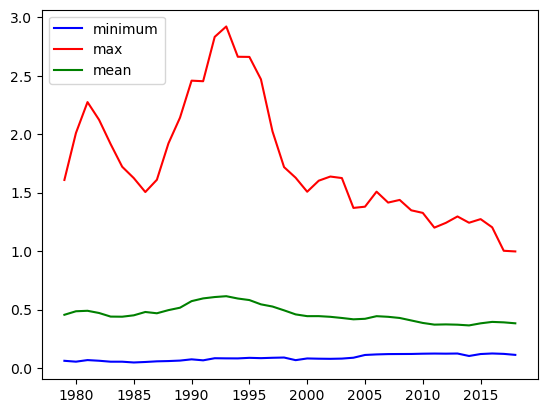

In [68]:
#med_violent calculations, mean max and min for medical legalization and violent crime rates
med_violent = crime_df[['year','state_name','violent_crime_rate','Year legalized (Med)']]
med_violent = med_violent.drop(med_violent[med_violent["Year legalized (Med)"] < 0].index)
min_med_violent = med_violent.groupby('year')['violent_crime_rate'].min()
max_med_violent = med_violent.groupby('year')['violent_crime_rate'].max()
mean_med_violent = med_violent.groupby('year')['violent_crime_rate'].mean()

#plotting
fig, ax = plt.subplots()

ax.plot(min_med_violent, color = 'blue', label = 'minimum')
ax.plot(max_med_violent, color = 'red', label = 'max')
ax.plot(mean_med_violent, color = 'green', label = 'mean')
ax.legend(loc = 'upper left')

plt.show()

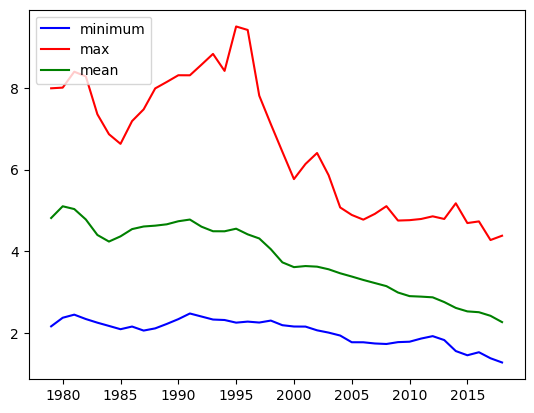

In [69]:
#med_property calculations, creaitng min max and mean values for medical legal and property crime rates
med_property = crime_df[['year','state_name','property_crime_rate','Year legalized (Med)']]
med_property = med_property.drop(med_property[med_property["Year legalized (Med)"] < 0].index)
min_med_property = med_property.groupby('year')['property_crime_rate'].min()
max_med_property = med_property.groupby('year')['property_crime_rate'].max()
mean_med_property = med_property.groupby('year')['property_crime_rate'].mean()

#plotting
fig, ax = plt.subplots()

ax.plot(min_med_property, color = 'blue', label = 'minimum')
ax.plot(max_med_property, color = 'red', label = 'max')
ax.plot(mean_med_property, color = 'green', label = 'mean')
ax.legend(loc = 'upper left')

plt.show()

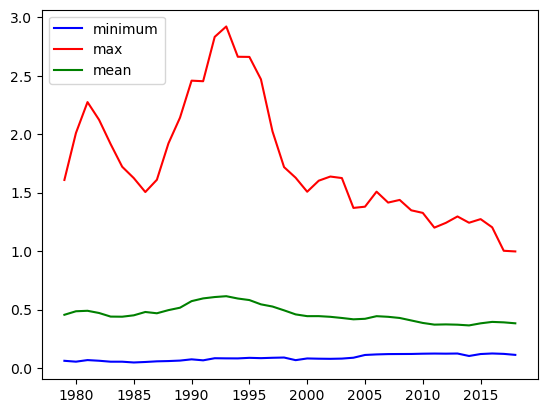

In [70]:
#rec_violent, creaitng min max and mean values for recreational legal and violent crime rates
rec_violent = crime_df[['year','state_name','violent_crime_rate','Year legalized (Rec)']]
rec_violent =rec_violent.drop(rec_violent[rec_violent["Year legalized (Rec)"] < 0].index)
rec_violent_min = rec_violent.groupby('year')['violent_crime_rate'].min()
rec_violent_max = rec_violent.groupby('year')['violent_crime_rate'].max()
rec_violent_mean = rec_violent.groupby('year')['violent_crime_rate'].mean()

#plotting
fig, ax = plt.subplots()

ax.plot(rec_violent_min, color = 'blue', label = 'minimum')
ax.plot(rec_violent_max, color = 'red', label = 'max')
ax.plot(rec_violent_mean, color = 'green', label = 'mean')
ax.legend(loc = 'upper left')

plt.show()

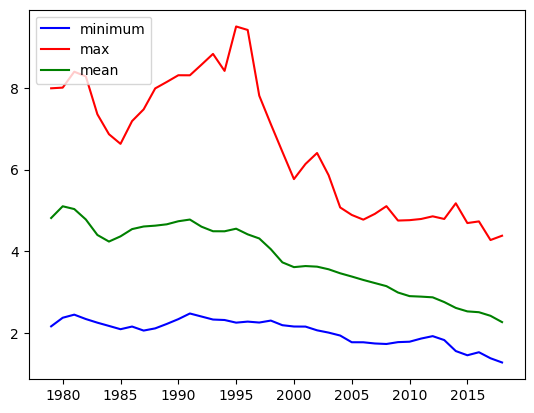

In [71]:
#Rec Property creaitng min max and mean values for recreational legal and property crime rates
rec_property = crime_df[['year','state_name','property_crime_rate','Year legalized (Rec)']]
rec_property =rec_property.drop(rec_property[rec_property["Year legalized (Rec)"] < 0].index)
rec_property_min = rec_property.groupby('year')['property_crime_rate'].min()
rec_property_max = rec_property.groupby('year')['property_crime_rate'].max()
rec_property_mean = rec_property.groupby('year')['property_crime_rate'].mean()

fig, ax = plt.subplots()

ax.plot(rec_property_min, color = 'blue', label = 'minimum')
ax.plot(rec_property_max, color = 'red', label = 'max')
ax.plot(rec_property_mean, color = 'green', label = 'mean')
ax.legend(loc = 'upper left')

plt.show()

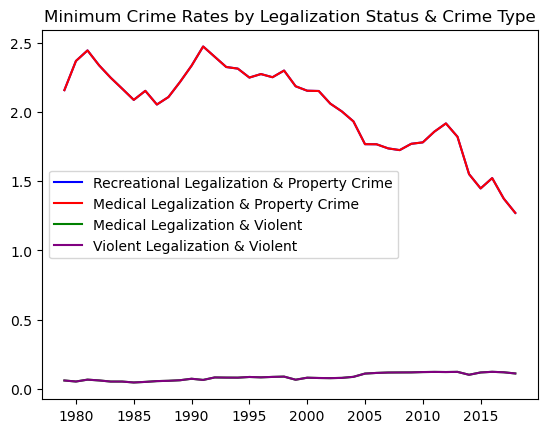

<Figure size 1200x200 with 0 Axes>

In [72]:
#min chart, this is what we are using to plot all minimum values by type of legalization

fig, ax = plt.subplots()

ax.plot(rec_property_min, color = 'blue', label = 'Recreational Legalization & Property Crime')
ax.plot(min_med_property, color = 'red', label = 'Medical Legalization & Property Crime')
ax.plot(min_med_violent, color = 'green', label = 'Medical Legalization & Violent')
ax.plot(rec_violent_min, color = 'purple', label = 'Violent Legalization & Violent')
ax.legend(loc = 'best')
plt.title("Minimum Crime Rates by Legalization Status & Crime Type")

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(2)

plt.show()

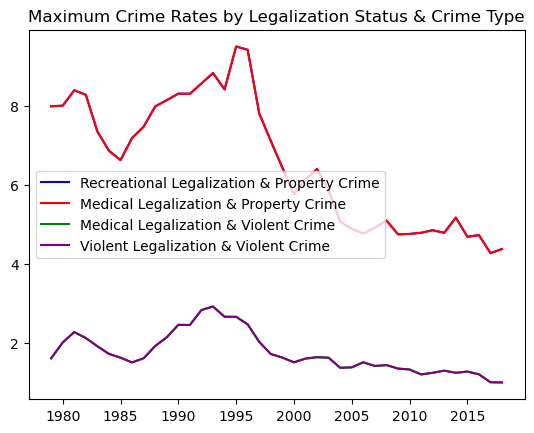

<Figure size 1200x200 with 0 Axes>

In [73]:
#max chart, this is what we are using to plot all maximum values by type of legalization
fig, ax = plt.subplots()

ax.plot(rec_property_max, color = 'blue', label = 'Recreational Legalization & Property Crime')
ax.plot(max_med_property, color = 'red', label = 'Medical Legalization & Property Crime')
ax.plot(max_med_violent, color = 'green', label = 'Medical Legalization & Violent Crime')
ax.plot(rec_violent_max, color = 'purple', label = 'Violent Legalization & Violent Crime')
ax.legend(loc = 'best')
plt.title("Maximum Crime Rates by Legalization Status & Crime Type")

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(2)
plt.show()


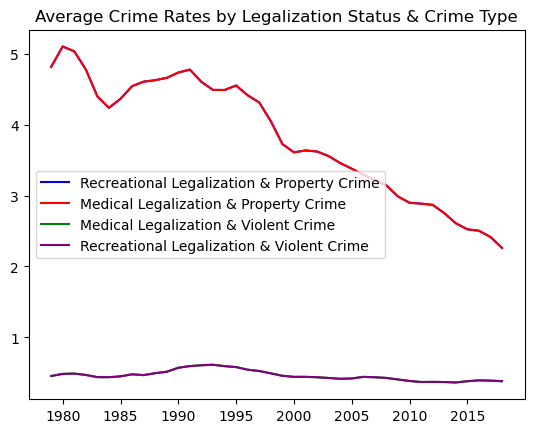

<Figure size 1200x200 with 0 Axes>

In [74]:
#mean chart this is what we are using to plot all mean values by type of legalization
fig, ax = plt.subplots()

ax.plot(rec_property_mean, color = 'blue', label = 'Recreational Legalization & Property Crime')
ax.plot(mean_med_property, color = 'red', label = 'Medical Legalization & Property Crime')
ax.plot(mean_med_violent, color = 'green', label = 'Medical Legalization & Violent Crime')
ax.plot(rec_violent_mean, color = 'purple', label = 'Recreational Legalization & Violent Crime')
ax.legend(loc = 'best')
plt.title("Average Crime Rates by Legalization Status & Crime Type")

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(2)
plt.show()